In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, recall_score, f1_score, precision_recall_fscore_support

In [13]:
%time datos = pd.read_csv('data_equilibrada.csv')

Wall time: 33.9 ms


In [14]:
datos.shape

(1479, 3)

In [15]:
%time datos.tokens=datos.tokens.apply(literal_eval)

Wall time: 263 ms


In [16]:
bow = pd.read_csv('bow.csv')

In [17]:
%time tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.token.values).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)

Wall time: 66.8 ms


In [18]:
tfidf

,stop,unsubscrib,verifi,inform,request,thank,address,lafargeholcim,benefit,com,...,chart,brotherhood,tanker,driver,vous,webmanag,theworknumb,ppay,tci,usf
0,0.000000,0.000000,0.093465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062238,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.126601,0.000000,0.093610,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.070336,0.071192,0.000000,0.000000,0.000000,0.084040,0.000000,0.099912,0.119191,0.114623,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,0.084983,0.086018,0.000000,0.000000,0.000000,0.101541,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1476,0.019315,0.019551,0.000000,0.000000,0.000000,0.000000,0.000000,0.082313,0.000000,0.031478,...,0.0,0.0,0.0,0.0,0.447812,0.0,0.0,0.0,0.0,0.0
1477,0.107704,0.109015,0.000000,0.000000,0.000000,0.128688,0.000000,0.000000,0.000000,0.175520,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf.values, datos.etiquetas.values, test_size=0.2, random_state=42)

In [38]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
Cs=np.arange(0.5,5.5,0.5)
for C in Cs:
    print("C:",C)
    svm = LinearSVC(C=C)
    svm.fit(X_train, y_train)

    predicciones_train=svm.predict(X_train)
    predicciones_test=svm.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))

    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

C: 0.5
Train:
[[132   3   1   3   3   2   5]
 [  2 227   0   1   1   0   0]
 [  0   0 181   0   0   0   0]
 [  1   1   0 171   0   0   0]
 [  6   0   0   1 152   0   1]
 [  0   0   0   0   0 144   3]
 [  8   0   0   1   0  12 121]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       149
           1       0.98      0.98      0.98       231
           2       0.99      1.00      1.00       181
           3       0.97      0.99      0.98       173
           4       0.97      0.95      0.96       160
           5       0.91      0.98      0.94       147
           6       0.93      0.85      0.89       142

    accuracy                           0.95      1183
   macro avg       0.95      0.95      0.95      1183
weighted avg       0.95      0.95      0.95      1183

Test:
[[23  4  2  2  3  1  2]
 [ 1 50  1  1  0  0  1]
 [ 0  0 41  0  0  0  0]
 [ 0  0  0 36  0  0  0]
 [ 2  0  0  0 34  0  3]
 [ 0  0  0  0  0 50  1]
 [ 3  1  0  1  2  5 2

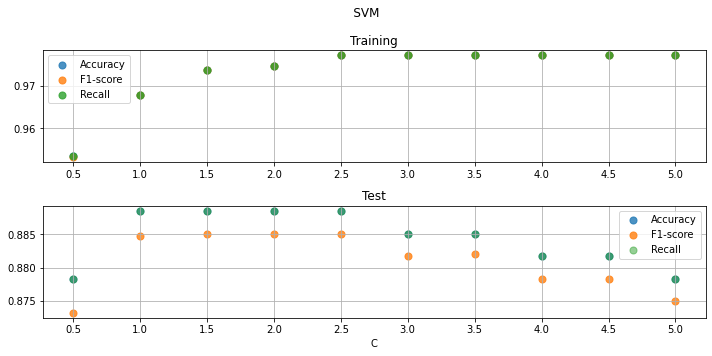

In [39]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     SVM")

ax[0].scatter(Cs,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(Cs,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(Cs,recall_train,s=50,alpha=0.8, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Training')
ax[0].set_xticks(Cs)

ax[1].scatter(Cs,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(Cs,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(Cs,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('C')
ax[1].set_xticks(Cs)

plt.show()